In [1]:
import os
import time
import random
import pickle
import warnings
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch import nn
from torch.utils.data import DataLoader

from utils import *
from models import SimVP

In [2]:
# ignore warning message
warnings.filterwarnings('ignore')

# fix seed
os.environ['PYTHONHASHSEED'] = str(42)
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)
torch.cuda.manual_seed(42)

In [3]:
if torch.cuda.is_available():
    print(f'GPU count: {torch.cuda.device_count()}')
    for i in range(torch.cuda.device_count()):
        print(f'GPU {i}: {torch.cuda.get_device_name(i)}')
        print(torch.cuda.get_device_properties(i))
else:
    print('No GPU')

GPU count: 2
GPU 0: NVIDIA A100-SXM4-40GB
_CudaDeviceProperties(name='NVIDIA A100-SXM4-40GB', major=8, minor=0, total_memory=40337MB, multi_processor_count=108)
GPU 1: NVIDIA A100-SXM4-40GB
_CudaDeviceProperties(name='NVIDIA A100-SXM4-40GB', major=8, minor=0, total_memory=40337MB, multi_processor_count=108)


In [4]:
# data : 2017~2021년 5월 31일까지의 전력 사용량 데이터
# train : 2017~2019년 3년동안의 전력 사용량 데이터(3년)
# val : 2020년 1년동안의 전력 사용량 데이터(1년)
# test : 2021년 5월 31일 6개월 동안의 전력 사용량 데이터(6개월)
elec = np.expand_dims(np.load('./dataset/2d_elec.npy'), axis=1)
elec_x, elec_y, elec_val = make_sequential(elec)

train_X = elec_x[:(365*24*3)]
train_y = elec_y[:(365*24*3)]

val_X = elec_x[(365*24*3):(365*24*4)]
val_y = elec_y[(365*24*3):(365*24*4)]

test_X = elec_x[(365*24*4):]
test_y = elec_y[(365*24*4):]

In [5]:
train_dataset = CustomDataset(train_X, train_y)
train_loader = DataLoader(train_dataset, 64, pin_memory=True)

val_dataset = CustomDataset(val_X, val_y)
val_loader = DataLoader(val_dataset, 64, pin_memory=True)

test_dataset = CustomDataset(test_X, test_y)
test_loader = DataLoader(test_dataset, 64, pin_memory=True)

In [6]:
print(f'train_size: {len(train_dataset)}')
print(train_dataset.X.shape)
print(train_dataset.Y.shape)

print(f'val_size: {len(val_dataset)}')
print(val_dataset.X.shape)
print(val_dataset.Y.shape)

print(f'test_size: {len(test_dataset)}')
print(test_dataset.X.shape)
print(test_dataset.Y.shape)

train_size: 26280
(26280, 24, 1, 8, 20)
(26280, 24, 1, 8, 20)
val_size: 8760
(8760, 24, 1, 8, 20)
(8760, 24, 1, 8, 20)
test_size: 3577
(3577, 24, 1, 8, 20)
(3577, 24, 1, 8, 20)


In [7]:
X, _ = next(iter(train_loader))

path = './save_model/SimVP/'
check_path(path)
model = SimVP(X.shape[1:])

In [8]:
optimizer = torch.optim.AdamW(model.parameters(), lr=.001)
criterion = nn.MSELoss()
epochs = 100
# gpu 0 사용
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

train_loss, val_loss = train(model, optimizer, criterion, epochs, train_loader, val_loader, device, path=path+'best_SimVP')

100%|██████████| 137/137 [00:02<00:00, 63.47it/s]


Epoch [1/100] 30.26s
loss: 0.0057 | val_loss: 0.0048


100%|██████████| 137/137 [00:02<00:00, 64.75it/s]


Epoch [2/100] 27.52s
loss: 0.0041 | val_loss: 0.0044


100%|██████████| 137/137 [00:02<00:00, 66.25it/s]


Epoch [3/100] 27.46s
loss: 0.0035 | val_loss: 0.0049


100%|██████████| 137/137 [00:02<00:00, 65.62it/s]


Epoch [4/100] 27.73s
loss: 0.0033 | val_loss: 0.0052


100%|██████████| 137/137 [00:02<00:00, 64.04it/s]


Epoch [5/100] 26.99s
loss: 0.0032 | val_loss: 0.0047


100%|██████████| 137/137 [00:02<00:00, 65.92it/s]


Epoch [6/100] 27.65s
loss: 0.0031 | val_loss: 0.0043


100%|██████████| 137/137 [00:02<00:00, 65.12it/s]


Epoch [7/100] 27.35s
loss: 0.0031 | val_loss: 0.0043


100%|██████████| 137/137 [00:02<00:00, 64.03it/s]


Epoch [8/100] 27.08s
loss: 0.0031 | val_loss: 0.0042


100%|██████████| 137/137 [00:02<00:00, 65.70it/s]


Epoch [9/100] 27.90s
loss: 0.0031 | val_loss: 0.0040


100%|██████████| 137/137 [00:02<00:00, 62.67it/s]


Epoch [10/100] 28.00s
loss: 0.0030 | val_loss: 0.0039


100%|██████████| 137/137 [00:02<00:00, 65.54it/s]


Epoch [11/100] 26.95s
loss: 0.0030 | val_loss: 0.0038


100%|██████████| 137/137 [00:02<00:00, 64.00it/s]


Epoch [12/100] 26.95s
loss: 0.0030 | val_loss: 0.0038


100%|██████████| 137/137 [00:02<00:00, 68.06it/s]


Epoch [13/100] 27.20s
loss: 0.0029 | val_loss: 0.0038


100%|██████████| 137/137 [00:02<00:00, 64.86it/s]


Epoch [14/100] 27.26s
loss: 0.0029 | val_loss: 0.0037


100%|██████████| 137/137 [00:02<00:00, 66.72it/s]


Epoch [15/100] 27.04s
loss: 0.0029 | val_loss: 0.0037


100%|██████████| 137/137 [00:02<00:00, 64.80it/s]


Epoch [16/100] 26.67s
loss: 0.0029 | val_loss: 0.0037


100%|██████████| 137/137 [00:02<00:00, 64.61it/s]


Epoch [17/100] 27.31s
loss: 0.0028 | val_loss: 0.0036


100%|██████████| 137/137 [00:02<00:00, 64.13it/s]


Epoch [18/100] 27.59s
loss: 0.0028 | val_loss: 0.0038


100%|██████████| 137/137 [00:02<00:00, 64.08it/s]


Epoch [19/100] 27.17s
loss: 0.0028 | val_loss: 0.0035


100%|██████████| 137/137 [00:02<00:00, 66.76it/s]


Epoch [20/100] 26.82s
loss: 0.0027 | val_loss: 0.0035


100%|██████████| 137/137 [00:02<00:00, 64.91it/s]


Epoch [21/100] 27.45s
loss: 0.0027 | val_loss: 0.0035


100%|██████████| 137/137 [00:02<00:00, 67.74it/s]


Epoch [22/100] 27.09s
loss: 0.0027 | val_loss: 0.0037


100%|██████████| 137/137 [00:02<00:00, 64.62it/s]


Epoch [23/100] 27.46s
loss: 0.0027 | val_loss: 0.0033


100%|██████████| 137/137 [00:02<00:00, 66.04it/s]


Epoch [24/100] 26.85s
loss: 0.0027 | val_loss: 0.0033


100%|██████████| 137/137 [00:02<00:00, 64.49it/s]


Epoch [25/100] 27.43s
loss: 0.0026 | val_loss: 0.0034


100%|██████████| 137/137 [00:02<00:00, 65.55it/s]


Epoch [26/100] 27.74s
loss: 0.0025 | val_loss: 0.0037


100%|██████████| 137/137 [00:02<00:00, 66.56it/s]


Epoch [27/100] 27.35s
loss: 0.0025 | val_loss: 0.0034


100%|██████████| 137/137 [00:02<00:00, 61.79it/s]


Epoch [28/100] 27.27s
loss: 0.0025 | val_loss: 0.0034


100%|██████████| 137/137 [00:02<00:00, 66.04it/s]


Epoch [29/100] 27.14s
loss: 0.0024 | val_loss: 0.0032


100%|██████████| 137/137 [00:02<00:00, 64.02it/s]


Epoch [30/100] 26.53s
loss: 0.0025 | val_loss: 0.0032


100%|██████████| 137/137 [00:02<00:00, 64.17it/s]


Epoch [31/100] 29.24s
loss: 0.0024 | val_loss: 0.0033


100%|██████████| 137/137 [00:02<00:00, 64.61it/s]


Epoch [32/100] 27.60s
loss: 0.0024 | val_loss: 0.0032


100%|██████████| 137/137 [00:02<00:00, 62.27it/s]


Epoch [33/100] 27.29s
loss: 0.0023 | val_loss: 0.0032


100%|██████████| 137/137 [00:02<00:00, 65.24it/s]


Epoch [34/100] 27.38s
loss: 0.0023 | val_loss: 0.0032


100%|██████████| 137/137 [00:02<00:00, 65.69it/s]


Epoch [35/100] 26.47s
loss: 0.0023 | val_loss: 0.0032


100%|██████████| 137/137 [00:02<00:00, 63.01it/s]


Epoch [36/100] 27.34s
loss: 0.0023 | val_loss: 0.0032


100%|██████████| 137/137 [00:02<00:00, 66.72it/s]


Epoch [37/100] 26.98s
loss: 0.0022 | val_loss: 0.0033


100%|██████████| 137/137 [00:02<00:00, 64.58it/s]


Epoch [38/100] 26.81s
loss: 0.0022 | val_loss: 0.0033


100%|██████████| 137/137 [00:02<00:00, 65.88it/s]


Epoch [39/100] 27.16s
loss: 0.0021 | val_loss: 0.0033


100%|██████████| 137/137 [00:02<00:00, 66.93it/s]


Epoch [40/100] 26.98s
loss: 0.0021 | val_loss: 0.0033


100%|██████████| 137/137 [00:02<00:00, 63.84it/s]


Epoch [41/100] 27.98s
loss: 0.0020 | val_loss: 0.0034


100%|██████████| 137/137 [00:02<00:00, 63.42it/s]


Epoch [42/100] 31.30s
loss: 0.0020 | val_loss: 0.0034


100%|██████████| 137/137 [00:02<00:00, 66.04it/s]


Epoch [43/100] 26.87s
loss: 0.0020 | val_loss: 0.0034


100%|██████████| 137/137 [00:02<00:00, 64.34it/s]


Epoch [44/100] 27.24s
loss: 0.0020 | val_loss: 0.0033


100%|██████████| 137/137 [00:02<00:00, 67.90it/s]


Epoch [45/100] 27.31s
loss: 0.0019 | val_loss: 0.0033


100%|██████████| 137/137 [00:02<00:00, 68.20it/s]


Epoch [46/100] 27.19s
loss: 0.0018 | val_loss: 0.0034


100%|██████████| 137/137 [00:02<00:00, 64.14it/s]


Epoch [47/100] 26.90s
loss: 0.0018 | val_loss: 0.0034


100%|██████████| 137/137 [00:02<00:00, 63.99it/s]


Epoch [48/100] 27.22s
loss: 0.0018 | val_loss: 0.0034


100%|██████████| 137/137 [00:02<00:00, 66.69it/s]


Epoch [49/100] 27.42s
loss: 0.0018 | val_loss: 0.0033


100%|██████████| 137/137 [00:02<00:00, 65.77it/s]


Epoch [50/100] 26.99s
loss: 0.0017 | val_loss: 0.0034


100%|██████████| 137/137 [00:02<00:00, 63.03it/s]


Epoch [51/100] 27.77s
loss: 0.0017 | val_loss: 0.0034


100%|██████████| 137/137 [00:02<00:00, 64.72it/s]


Epoch [52/100] 26.47s
loss: 0.0017 | val_loss: 0.0032


100%|██████████| 137/137 [00:02<00:00, 66.28it/s]


Epoch [53/100] 26.99s
loss: 0.0016 | val_loss: 0.0033


100%|██████████| 137/137 [00:02<00:00, 64.82it/s]


Epoch [54/100] 27.28s
loss: 0.0016 | val_loss: 0.0032


100%|██████████| 137/137 [00:02<00:00, 64.55it/s]


Epoch [55/100] 27.47s
loss: 0.0015 | val_loss: 0.0033


100%|██████████| 137/137 [00:02<00:00, 63.33it/s]


Epoch [56/100] 27.25s
loss: 0.0015 | val_loss: 0.0033


100%|██████████| 137/137 [00:02<00:00, 64.98it/s]


Epoch [57/100] 27.51s
loss: 0.0015 | val_loss: 0.0031


100%|██████████| 137/137 [00:02<00:00, 67.03it/s]


Epoch [58/100] 27.40s
loss: 0.0014 | val_loss: 0.0032


100%|██████████| 137/137 [00:02<00:00, 67.11it/s]


Epoch [59/100] 27.35s
loss: 0.0014 | val_loss: 0.0033


100%|██████████| 137/137 [00:02<00:00, 64.02it/s]


Epoch [60/100] 27.64s
loss: 0.0014 | val_loss: 0.0031


100%|██████████| 137/137 [00:02<00:00, 65.13it/s]


Epoch [61/100] 27.58s
loss: 0.0014 | val_loss: 0.0032


100%|██████████| 137/137 [00:02<00:00, 65.96it/s]


Epoch [62/100] 27.32s
loss: 0.0013 | val_loss: 0.0031


100%|██████████| 137/137 [00:02<00:00, 65.58it/s]


Epoch [63/100] 26.26s
loss: 0.0013 | val_loss: 0.0033


100%|██████████| 137/137 [00:02<00:00, 62.72it/s]


Epoch [64/100] 27.15s
loss: 0.0013 | val_loss: 0.0032


100%|██████████| 137/137 [00:02<00:00, 63.15it/s]


Epoch [65/100] 27.20s
loss: 0.0013 | val_loss: 0.0032


100%|██████████| 137/137 [00:02<00:00, 64.52it/s]


Epoch [66/100] 27.42s
loss: 0.0012 | val_loss: 0.0033


100%|██████████| 137/137 [00:02<00:00, 64.62it/s]


Epoch [67/100] 27.35s
loss: 0.0012 | val_loss: 0.0030


100%|██████████| 137/137 [00:02<00:00, 65.13it/s]


Epoch [68/100] 27.45s
loss: 0.0012 | val_loss: 0.0030


100%|██████████| 137/137 [00:02<00:00, 64.01it/s]


Epoch [69/100] 27.21s
loss: 0.0012 | val_loss: 0.0030


100%|██████████| 137/137 [00:02<00:00, 64.50it/s]


Epoch [70/100] 26.66s
loss: 0.0011 | val_loss: 0.0029


100%|██████████| 137/137 [00:02<00:00, 65.00it/s]


Epoch [71/100] 27.46s
loss: 0.0011 | val_loss: 0.0031


100%|██████████| 137/137 [00:02<00:00, 63.67it/s]


Epoch [72/100] 26.76s
loss: 0.0011 | val_loss: 0.0031


100%|██████████| 137/137 [00:02<00:00, 63.55it/s]


Epoch [73/100] 27.08s
loss: 0.0011 | val_loss: 0.0032


100%|██████████| 137/137 [00:02<00:00, 65.96it/s]


Epoch [74/100] 27.48s
loss: 0.0011 | val_loss: 0.0033


100%|██████████| 137/137 [00:02<00:00, 64.14it/s]


Epoch [75/100] 26.65s
loss: 0.0010 | val_loss: 0.0032


100%|██████████| 137/137 [00:02<00:00, 64.34it/s]


Epoch [76/100] 27.55s
loss: 0.0010 | val_loss: 0.0032


100%|██████████| 137/137 [00:02<00:00, 64.64it/s]


Epoch [77/100] 27.29s
loss: 0.0010 | val_loss: 0.0032


100%|██████████| 137/137 [00:02<00:00, 65.24it/s]


Epoch [78/100] 26.82s
loss: 0.0010 | val_loss: 0.0031


100%|██████████| 137/137 [00:02<00:00, 63.12it/s]


Epoch [79/100] 27.45s
loss: 0.0009 | val_loss: 0.0030


100%|██████████| 137/137 [00:02<00:00, 63.80it/s]


Epoch [80/100] 27.45s
loss: 0.0009 | val_loss: 0.0032


100%|██████████| 137/137 [00:02<00:00, 67.01it/s]


Epoch [81/100] 27.70s
loss: 0.0010 | val_loss: 0.0031


100%|██████████| 137/137 [00:02<00:00, 66.50it/s]


Epoch [82/100] 27.42s
loss: 0.0010 | val_loss: 0.0032


100%|██████████| 137/137 [00:02<00:00, 66.43it/s]


Epoch [83/100] 27.22s
loss: 0.0010 | val_loss: 0.0030


100%|██████████| 137/137 [00:02<00:00, 65.08it/s]


Epoch [84/100] 26.80s
loss: 0.0009 | val_loss: 0.0029


100%|██████████| 137/137 [00:02<00:00, 66.77it/s]


Epoch [85/100] 27.07s
loss: 0.0008 | val_loss: 0.0028


100%|██████████| 137/137 [00:02<00:00, 67.22it/s]


Epoch [86/100] 27.42s
loss: 0.0008 | val_loss: 0.0028


100%|██████████| 137/137 [00:02<00:00, 66.14it/s]


Epoch [87/100] 27.22s
loss: 0.0008 | val_loss: 0.0027


100%|██████████| 137/137 [00:02<00:00, 65.25it/s]


Epoch [88/100] 26.98s
loss: 0.0008 | val_loss: 0.0029


100%|██████████| 137/137 [00:02<00:00, 62.68it/s]


Epoch [89/100] 27.34s
loss: 0.0008 | val_loss: 0.0028


100%|██████████| 137/137 [00:02<00:00, 65.51it/s]


Epoch [90/100] 27.21s
loss: 0.0007 | val_loss: 0.0028


100%|██████████| 137/137 [00:02<00:00, 65.02it/s]


Epoch [91/100] 27.11s
loss: 0.0007 | val_loss: 0.0028


100%|██████████| 137/137 [00:02<00:00, 63.58it/s]


Epoch [92/100] 27.60s
loss: 0.0007 | val_loss: 0.0025


100%|██████████| 137/137 [00:02<00:00, 65.37it/s]


Epoch [93/100] 27.27s
loss: 0.0007 | val_loss: 0.0024


100%|██████████| 137/137 [00:02<00:00, 62.74it/s]


Epoch [94/100] 26.66s
loss: 0.0007 | val_loss: 0.0024


100%|██████████| 137/137 [00:02<00:00, 65.49it/s]


Epoch [95/100] 27.19s
loss: 0.0007 | val_loss: 0.0023


100%|██████████| 137/137 [00:02<00:00, 65.95it/s]


Epoch [96/100] 27.41s
loss: 0.0007 | val_loss: 0.0024


100%|██████████| 137/137 [00:02<00:00, 62.61it/s]


Epoch [97/100] 26.86s
loss: 0.0007 | val_loss: 0.0024


100%|██████████| 137/137 [00:02<00:00, 63.46it/s]


Epoch [98/100] 27.45s
loss: 0.0006 | val_loss: 0.0023


100%|██████████| 137/137 [00:01<00:00, 69.62it/s]


Epoch [99/100] 27.58s
loss: 0.0006 | val_loss: 0.0025


100%|██████████| 137/137 [00:02<00:00, 67.23it/s]

Epoch [100/100] 26.96s
loss: 0.0006 | val_loss: 0.0025
Train time: 2736.11s
Best Epoch: 98, Best mse: 0.0023


In [9]:
with open(path + "train_loss.pkl","wb") as f:
    pickle.dump(train_loss, f)
    
with open(path + "val_loss.pkl","wb") as f:
    pickle.dump(val_loss, f)

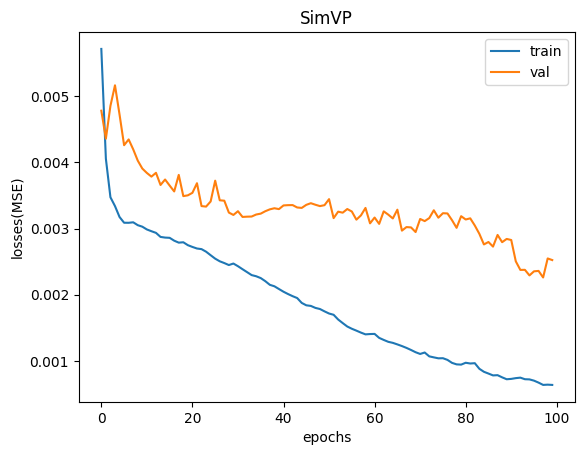

In [10]:
plt.title('SimVP')
plt.plot(train_loss, label='train')
plt.plot(val_loss, label='val')
plt.xlabel('epochs')
plt.ylabel('losses(MSE)')
plt.legend()
plt.show()